<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   price data  470 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


<Axes: >

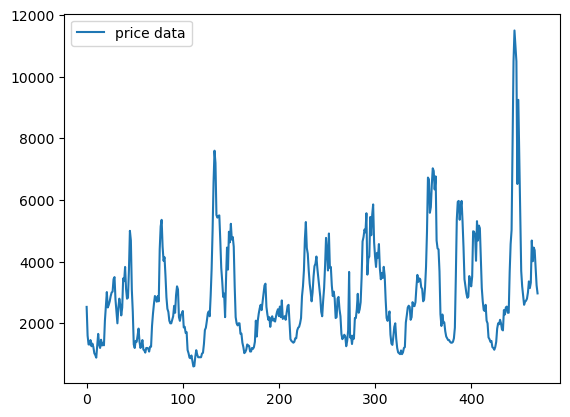

In [3]:
import pandas as pd
df=pd.read_csv("D:/thesis/weekly data/price data sealdah.csv")
df.info()

df.plot()

<Axes: >

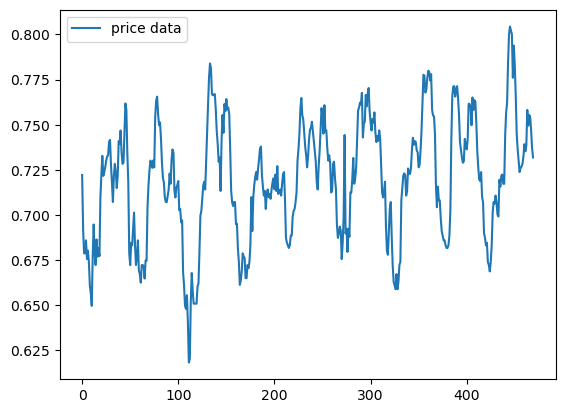

In [6]:
import numpy as np
df=np.log(df)
df.plot()

In [7]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

D:\data analytics\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


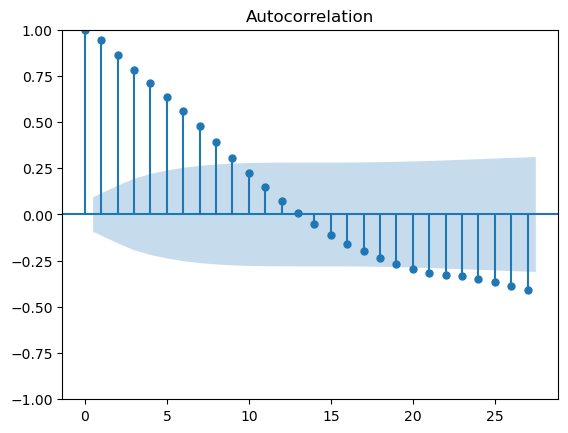

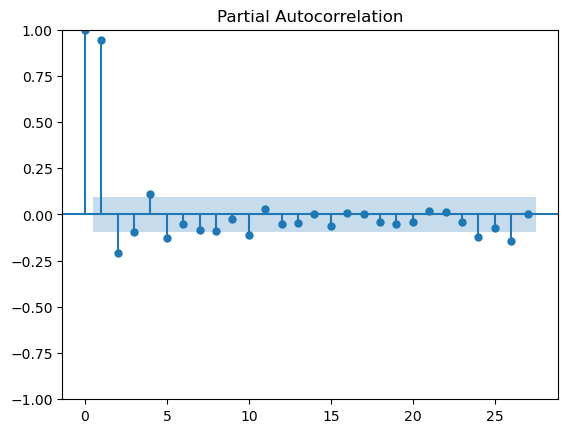

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 8.148819093133598e-07


In [10]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             price data   No. Observations:                  440
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1368.003
Date:                Sat, 06 Jul 2024   AIC                          -2728.006
Time:                        21:15:35   BIC                          -2711.668
Sample:                             0   HQIC                         -2721.561
                                - 440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5851      0.176     -3.320      0.001      -0.931      -0.240
ma.L1          0.7774      0.178      4.368      0.000       0.429       1.126
ma.L2          0.2464      0.048      5.143      0.0

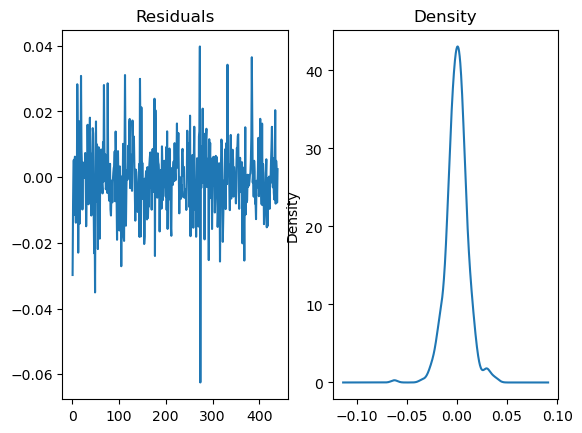

In [12]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

D:\data analytics\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


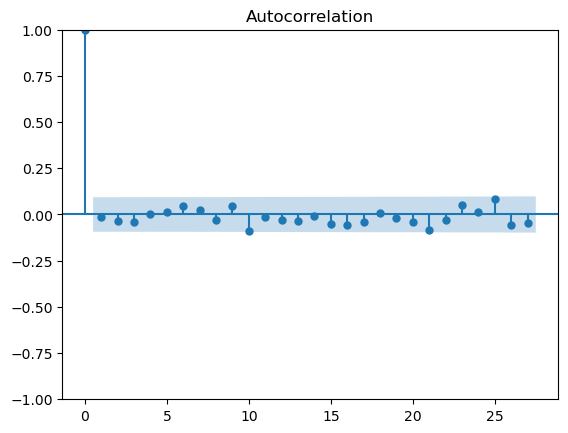

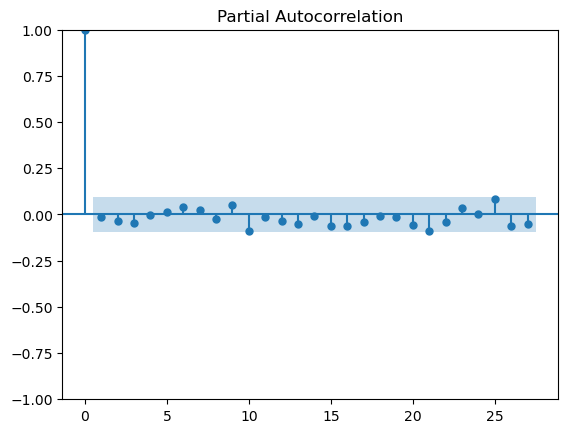

In [13]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

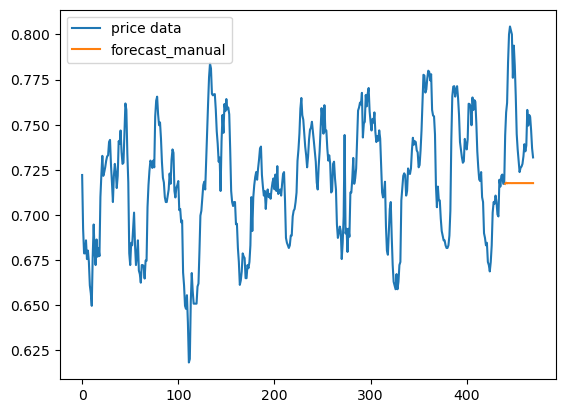

In [14]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.037934249974156856
mape - manual: 0.04915172320791051
rmse - manual: 0.04565651930892397
